In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
from statsmodels.tsa.arima_model import ARIMA

Populating the interactive namespace from numpy and matplotlib


## Dataframe without date as index

In [12]:
date_noindex = pd.read_csv("MLS_data.csv", parse_dates=[0],infer_datetime_format=True)
date_noindex.head()

,Date,apartment_pc,townhouse_pc,detached_PC,detached HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Detached,...,First Time Home Buyer Downpayment,Inflation,cad to usd exchange rates,Dollar Volume,days in market,price per sqft,new listings,no of sales,sales/active ratio,Unnamed: 33
0,2005-01-01,0.000000,0.00,0.00,100.00,100.0,100.0,100.0,100.0,543100,...,1.1,1.8,0.826,648808485,48,222,3357,1714.0,0.172,NaN
1,2005-01-02,0.802568,0.51,0.41,100.45,100.5,100.4,100.5,100.8,545300,...,1.1,1.8,0.806,1188350508,26,231,4134,3088.0,0.302,NaN
2,2005-01-03,0.796178,0.57,0.50,100.85,100.9,100.8,101.1,101.6,548000,...,1.1,2.0,0.822,1631648403,24,239,5111,3961.0,0.379,NaN
3,2005-01-04,0.671406,0.60,0.40,101.30,101.4,101.2,101.7,102.3,550200,...,1.1,1.9,0.811,1681998034,19,239,5840,4051.0,0.358,NaN
4,2005-01-05,1.765398,1.10,1.18,102.50,102.7,102.3,102.8,104.1,556700,...,1.1,1.8,0.796,1878522245,19,249,5131,4465.0,0.402,NaN


## Dataframe with date as index

In [69]:
realestate_df = pd.read_csv("MLS_data.csv",index_col=[0],parse_dates=[0],infer_datetime_format=True)

## Preprocessing

In [70]:
ts=realestate_df.drop(['One_Storey_HPI','Two_Storey_HPI','Single_Family_Benchmark','One_Storey_Benchmark','Two_Storey_Benchmark'],axis=1)
ts.head()

,apartment_pc,townhouse_pc,detached_PC,detached HPI,Townhouse_HPI,Apartment_HPI,Detached,Townhouse_Benchmark,Apartment_Benchmark,Population Intrapolated,...,First Time Home Buyer Downpayment,Inflation,cad to usd exchange rates,Dollar Volume,days in market,price per sqft,new listings,no of sales,sales/active ratio,Unnamed: 33
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,0.000000,0.00,0.00,100.00,100.0,100.0,543100,314200,249200,2173374.00,...,1.1,1.8,0.826,648808485,48,222,3357,1714.0,0.172,NaN
2005-01-02,0.802568,0.51,0.41,100.45,100.5,100.8,545300,315800,251200,2175445.75,...,1.1,1.8,0.806,1188350508,26,231,4134,3088.0,0.302,NaN
2005-01-03,0.796178,0.57,0.50,100.85,101.1,101.6,548000,317600,253200,2177517.50,...,1.1,2.0,0.822,1631648403,24,239,5111,3961.0,0.379,NaN
2005-01-04,0.671406,0.60,0.40,101.30,101.7,102.3,550200,319500,254900,2179589.25,...,1.1,1.9,0.811,1681998034,19,239,5840,4051.0,0.358,NaN
2005-01-05,1.765398,1.10,1.18,102.50,102.8,104.1,556700,323000,259400,2181661.00,...,1.1,1.8,0.796,1878522245,19,249,5131,4465.0,0.402,NaN


## Splits using log and 1st order differencing

In [71]:



#Transform
ts_log=np.log(ts.iloc[:,0:27])
ts_log_diff=ts_log-ts_log.shift()
ts_log_diff=ts_log_diff[1:]

#Split
train=ts_log[0:144]
valid=ts_log[144:156]
test=ts_log[156:168]
test



,Population Intrapolated,Unemployment,Prime Rate,GDP,CPI,Foreign Buyers Tax,Household Income,Per capita Income,Stress Test,First Time Home Buyer Downpayment,Inflation,cad to usd exchange rates,Dollar Volume,days in market,price per sqft,new listings,no of sales,sales/active ratio
Date,,,,,,,,,,,,,,,,,,
2018-01-01,14.791664,1.435085,1.238374,12.575160,4.857484,2.70805,12.221831,10.662076,3.912023,2.014903,0.587787,-0.218156,21.360048,2.833213,6.499787,8.237479,7.507141,-1.461018
2018-01-02,14.792793,1.410987,1.238374,12.578649,4.864453,2.70805,12.225186,10.665431,3.912023,2.014903,0.693147,-0.229413,21.575883,2.302585,6.555357,8.352319,7.701200,-1.362578
2018-01-03,14.793922,1.386294,1.238374,12.582127,4.868303,2.70805,12.228530,10.668775,3.912023,2.014903,0.693147,-0.257476,21.667254,2.302585,6.539586,8.409831,7.832808,-1.290984
2018-01-04,14.795049,1.410987,1.238374,12.585592,4.869839,2.70805,12.231863,10.672107,3.912023,2.014903,0.693147,-0.242072,21.742105,2.397895,6.539586,8.666992,7.860571,-1.414694
2018-01-05,14.796175,1.435085,1.238374,12.589046,4.874434,2.70805,12.235185,10.675429,3.912023,2.014903,0.693147,-0.252315,21.864979,2.397895,6.535241,8.769507,7.947325,-1.465338
2018-01-06,14.797299,1.435085,1.238374,12.592487,4.877485,2.70805,12.238495,10.678740,3.912023,2.014903,0.693147,-0.271809,21.684822,2.639057,6.536692,8.575273,7.798113,-1.671313
2018-01-07,14.798422,1.481605,1.308333,12.596751,4.885072,2.70805,12.242653,10.682898,3.912023,2.014903,0.693147,-0.273122,21.484620,2.995732,6.533789,8.474077,7.643004,-1.857899
2018-01-08,14.799544,1.504077,1.308333,12.600997,4.884316,2.70805,12.246794,10.687039,3.912023,2.014903,0.693147,-0.266573,21.404351,3.178054,6.520621,8.265136,7.570959,-1.910543
2018-01-09,14.800665,1.568616,1.308333,12.605224,4.880527,2.70805,12.250918,10.691162,3.912023,2.014903,0.641854,-0.265268,21.225438,3.178054,6.480045,8.576028,7.378384,-2.171557


## Dickey Fuller test to check stationarity

In [76]:
from statsmodels.tsa.stattools import adfuller
for i in range(0,18):
    dftest = adfuller(ts_log.iloc[1:168,i],autolag='AIC')
    print(i)
    print(dftest[1])

0
0.8227880720644409
1
0.4726576687589503
2
0.07626032276433613
3
0.9964322237697999
4
0.9718247317550984
5
0.9015269809759999
6
0.9355850117807407
7
0.9636274166489461
8
0.9302308789345046
9
0.2854997011258986
10
0.44715367394444433
11
0.5376072209588477
12
0.17157674109934185
13
0.22751860128315715
14
0.7445745810017922
15
0.00012133270568781418
16
0.0015247765898695881
17
0.11829450147648451


Non stationary columns even after taking logs

In [77]:
from statsmodels.tsa.stattools import adfuller
for i in range(0,18):
    dftest = adfuller(ts_log_diff.iloc[1:167,i],autolag='AIC')
    print(i)
    print(dftest[1])

0
0.11483405070536024
1
0.014019525056220852
2
0.003772439640918059
3
0.00028488441488203287
4
0.023701375380398956
5
5.4982764798880335e-24
6
0.182656804307473
7
0.2563565544350975
8
5.4982764798880335e-24
9
3.080846073861751e-24
10
2.2697176648721844e-05
11
1.364568050374561e-05
12
9.088637908815207e-05
13
0.0023776938211601743
14
4.313726436175922e-28
15
4.2961349325477614e-07
16
0.00028915219680019397
17
2.606540667337702e-05


stationary variables when log and 1st order differencing is applied

## ACF AND PACF plots to determine P(lag) and q(error)

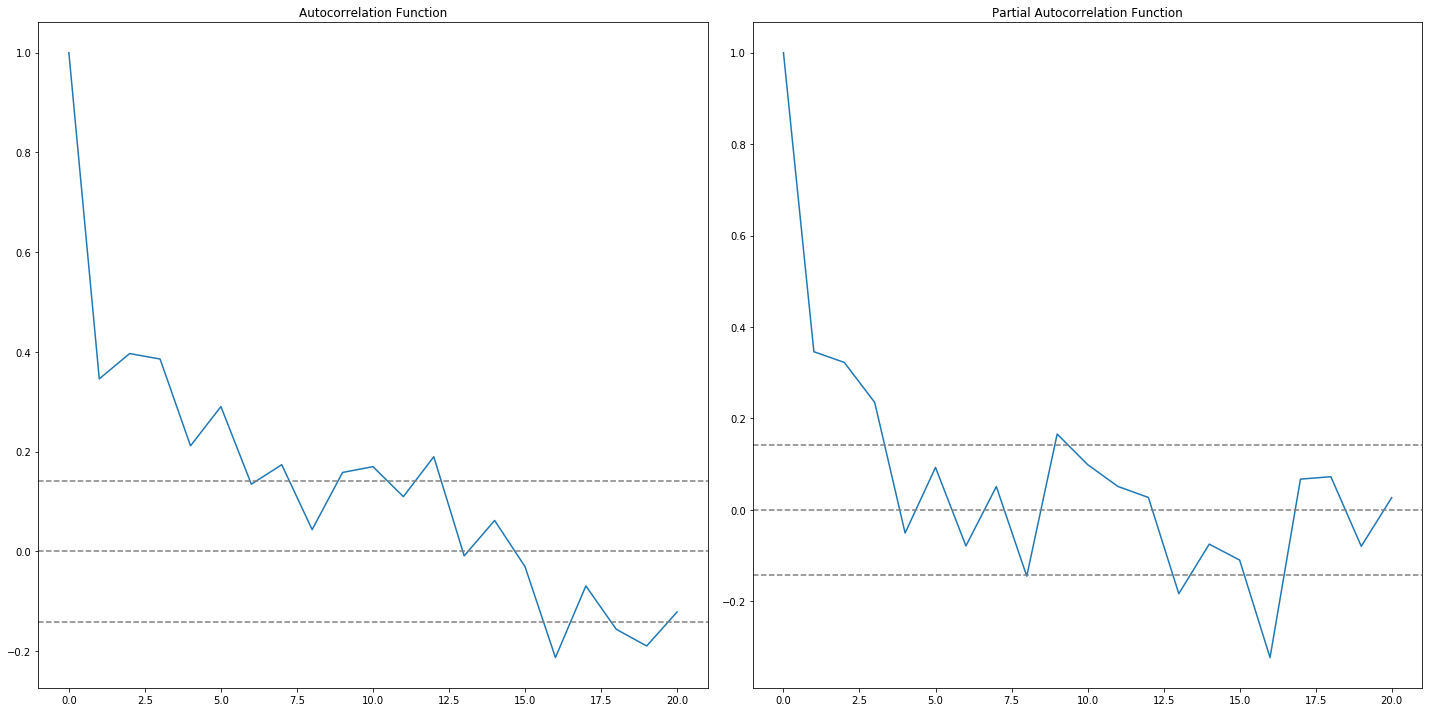

In [78]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff.iloc[0:167,2:3], nlags=20)
lag_pacf = pacf(ts_log_diff.iloc[0:167,2:3], nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## Univariate Arima with Train-Test split

In [84]:
#Transform
ts_log=np.log(ts)
ts_log_diff=ts_log-ts_log.shift()
ts_log_diff=ts_log_diff[1:]

#Split
train_uni=ts_log[0:144]
test=ts_log[144:168]



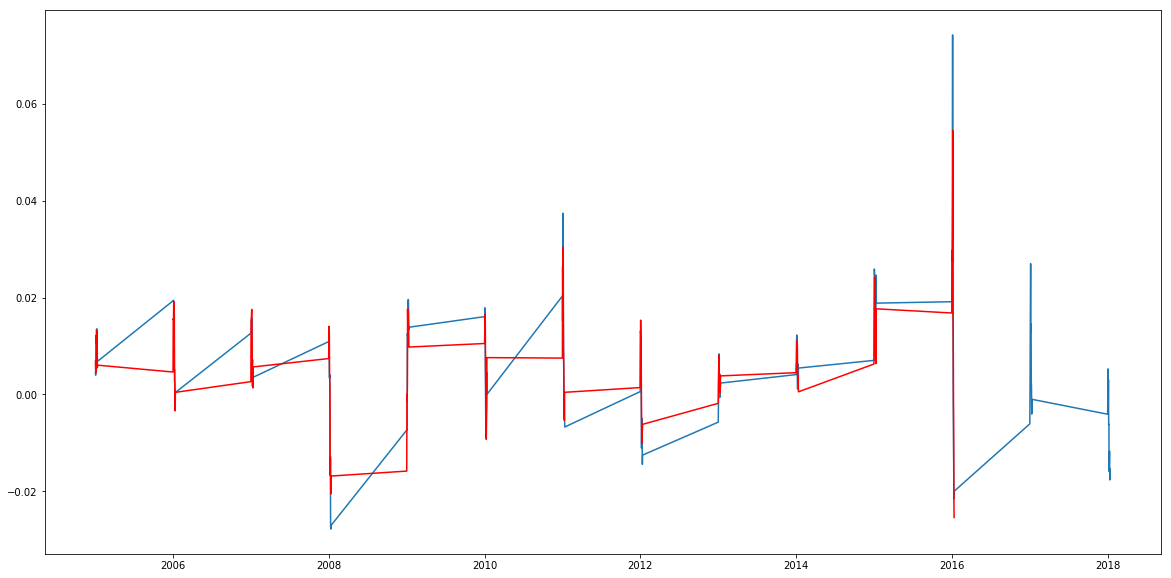

In [85]:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_uni['detached HPI'], order=(2,1,4))  
results_ARIMA = model.fit()

plt.plot(ts_log_diff['detached HPI'])
plt.plot(results_ARIMA.fittedvalues, color='red')


## Converting back to original values and plotting

In [86]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log=pd.Series(train['detached HPI'].ix[0],index=train.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

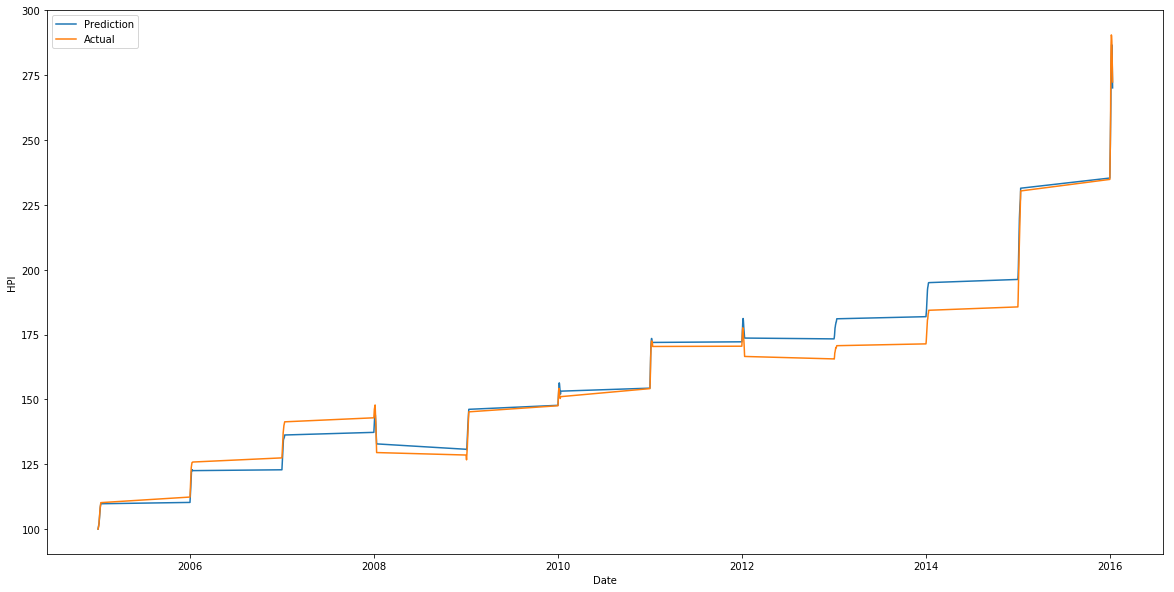

In [99]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(predictions_ARIMA,label='Prediction')
plt.plot(ts.iloc[0:144,3],label='Actual')
plt.xlabel('Date')
plt.ylabel('HPI')
plt.legend()

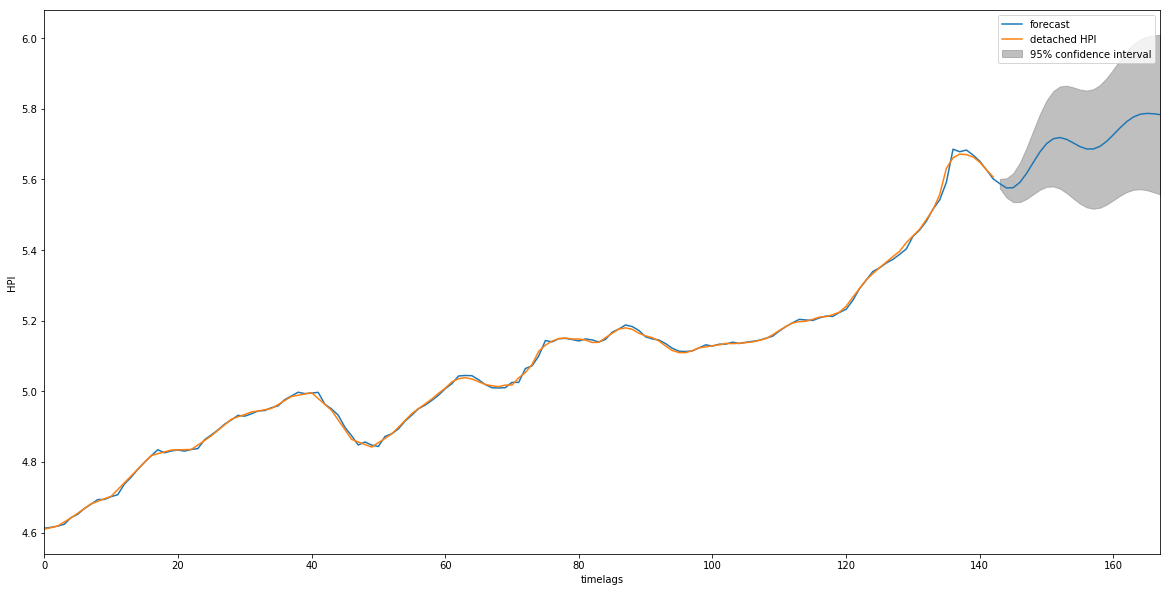

In [102]:
results_ARIMA.plot_predict(start=1,end=168,dynamic=False,plot_insample=True)
plt.xlabel('timelags')
plt.ylabel('HPI')
plt.legend()
plt.show()

### Multivariate Timeseries

# splits

In [115]:
ts_log=np.log(ts)
train=ts_log[0:144]
valid=ts_log[144:156]
test=ts_log[156:168]
endo=train['detached HPI']
exo=train[['Population Intrapolated',
        'Prime Rate', 'CPI', 'Unemployment',  
        'Per capita Income',  
        'cad to usd exchange rates','no of sales']]
valid_multi=valid[['Population Intrapolated',
        'Prime Rate', 'CPI',  'Unemployment', 
        'Per capita Income', 
        'cad to usd exchange rates','no of sales']]
test_multi=test[['Population Intrapolated',
        'Prime Rate', 'CPI',  'Unemployment', 
        'Per capita Income',  
        'cad to usd exchange rates','no of sales']]
valid_true=valid['detached HPI']
pred_true=test['detached HPI']

#### Testing with HPI


In [116]:
import itertools
p=d=q=range(0,4)
pdq=list(itertools.product(p,d,q))
error=[]
order=[]
for para in pdq:
    try:
        model = ARIMA(endog=endo,exog=exo, order=para)
        model_fit = model.fit()
        valid_pred_log=model_fit.forecast(exog=valid_multi, steps=12)
        valid_pred=valid_pred_log[0]
        mse=mean_squared_error(valid_true,valid_pred)
        error.append(mse)
        order.append(para)
        print(para)
        print(mse)
        print(valid_pred)
    except:
        continue
#Getting optimum p,q and d values
optimum_error_pos= error.index(min(error))
optimum_order=order[optimum_error_pos]
print(optimum_error_pos)
print(optimum_order)
print(min(error))

(0, 0, 0)
0.003044850774847559
[5.49739313 5.52657565 5.57658425 5.5841775  5.62640587 5.62646579
 5.6263722  5.65091153 5.64029396 5.65718069 5.66232072 5.62702414]
(0, 0, 1)
0.00618640927738575
[5.55236964 5.52033823 5.55159123 5.55957689 5.58431493 5.58638261
 5.58507016 5.60111165 5.60154697 5.6148036  5.62118331 5.60744492]
(0, 1, 0)
7.791846938495486e-05
[5.60054739 5.60458331 5.61642462 5.62935428 5.64720894 5.66497364
 5.67362152 5.68311609 5.68922468 5.69620712 5.69940508 5.69572402]
(0, 1, 1)
0.00012336691911282046
[5.59779146 5.60235388 5.61331307 5.62542461 5.64185906 5.65867071
 5.66731796 5.67693093 5.68329783 5.69034966 5.69386141 5.69157155]
(0, 1, 2)
0.0002454544126084715
[5.59669339 5.60004274 5.61012501 5.62135227 5.6363125  5.65183563
 5.65986268 5.66865503 5.67440169 5.68070536 5.68372923 5.68184545]
(0, 1, 3)
0.0005003706552310104
[5.59447893 5.59482197 5.60319777 5.61395637 5.62808554 5.64293367
 5.65113617 5.66012999 5.66625353 5.67283847 5.67642712 5.67571306]


Populating the interactive namespace from numpy and matplotlib


(200, 300)

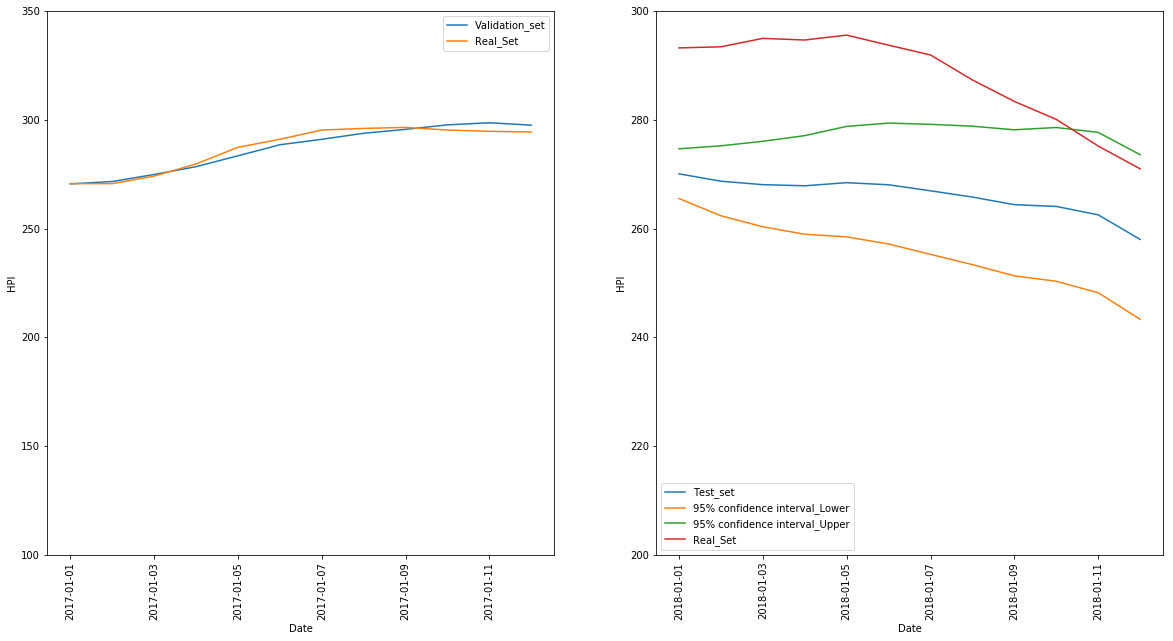

In [117]:
optimum_error_pos= error.index(min(error))
optimum_order=order[optimum_error_pos]
model = ARIMA(endog=endo,exog=exo, order=optimum_order)
model_fit = model.fit()
valid_pred_log=model_fit.forecast(exog=valid_multi, steps=12)
test_pred_log=model_fit.forecast(exog=test_multi, steps=12)
valid_pred=np.exp(valid_pred_log[0])
test_pred=np.exp(test_pred_log[0])
#looping to get upper and lower confidence intervals
lower=[]
upper=[]
for i in range(0,12):
    for j in range(0,2):
        
        if j==0:
            values_lower_log=model_fit.forecast(exog=test_multi,steps=12)[2][i][j]
            values_lower=np.exp(values_lower_log)
            lower.append(values_lower)
        else:
            values_upper_log=model_fit.forecast(exog=test_multi,steps=12)[2][i][j]
            values_upper=np.exp(values_upper_log)
            upper.append(values_upper)
            


%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

#plotting validation set 
plt.subplot(121) 
plt.plot(date_noindex.iloc[144:156,0],valid_pred,label='Validation_set')
plt.plot(date_noindex.iloc[144:156,0],date_noindex.iloc[144:156,4],label='Real_Set')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('HPI')
plt.legend()
plt.ylim(100,350)
    
#plotting test set     
plt.subplot(122)    
plt.plot(date_noindex.iloc[156:168,0],test_pred,label='Test_set')
plt.plot(date_noindex.iloc[156:168,0],lower,label='95% confidence interval_Lower')
plt.plot(date_noindex.iloc[156:168,0],upper,label='95% confidence interval_Upper')
plt.plot(date_noindex.iloc[156:168,0],date_noindex.iloc[156:168,4],label='Real_Set')
plt.xlabel('Date')
plt.ylabel('HPI')
plt.xticks(rotation=90)
plt.legend()
plt.ylim(200,300)




## Visualising the final results

test accuracy on percentage change in 2018: 66.66666666666666


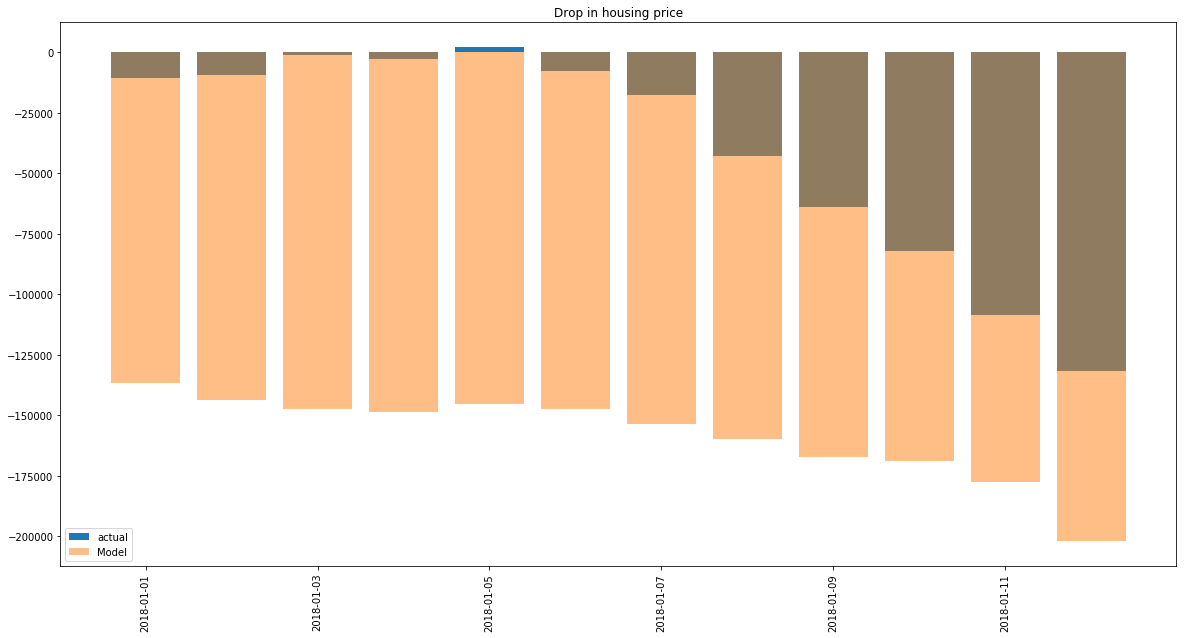

,0,2,3,inc/dec_pred,inc/dec_real,corr_pred,pred_hp,real_hp,HP_sav/app_model,HP_sav/app_actual
0,270.081162,293.25,2018-01-01,1,1,0,1.466811e+06,1592640.75,-136489.210251,-10659.25
1,268.726560,293.45,2018-01-02,0,1,0,1.459454e+06,1593726.95,-143846.055034,-9573.05
2,268.091732,295.00,2018-01-03,0,1,0,1.456006e+06,1602145.00,-147293.803911,-1155.00
3,267.884942,294.70,2018-01-04,0,0,1,1.454883e+06,1600515.70,-148416.878765,-2784.30
4,268.455459,295.60,2018-01-05,1,1,0,1.457982e+06,1605403.60,-145318.399612,2103.60
5,268.068023,293.75,2018-01-06,0,0,1,1.455877e+06,1595356.25,-147422.567900,-7943.75
6,266.961107,291.95,2018-01-07,0,0,1,1.449866e+06,1585580.45,-153434.225244,-17719.55
7,265.808198,287.35,2018-01-08,0,0,1,1.443604e+06,1560597.85,-159695.679124,-42702.15
8,264.409417,283.40,2018-01-09,0,0,1,1.436008e+06,1539145.40,-167292.453869,-64154.60
9,264.085358,280.10,2018-01-10,0,0,1,1.434248e+06,1521223.10,-169052.419499,-82076.90


In [118]:
date=date_noindex.loc[156:167,['Date']].reset_index(drop=True)
real=date_noindex.loc[156:167,['detached HPI']].reset_index()
pred_df=pd.DataFrame(test_pred)
results=pd.concat([pred_df,real,date],axis=1,join='outer',ignore_index=True)
res=results.drop(1,axis=1)
res['inc/dec_pred']=0
res['inc/dec_real']=0
res['corr_pred']=0
res['pred_hp']=0
res['real_hp']=0


for i in range(0,12):
    if res.iloc[i,0]>res.iloc[i-1,0]:
        res.loc[i,['inc/dec_pred']]=1
    else:
        res.loc[i,['inc/dec_pred']]=0
        
for i in range(0,12):
    if res.iloc[i,1]>res.iloc[i-1,1]:
        res.loc[i,['inc/dec_real']]=1
    else:
        res.loc[i,['inc/dec_real']]=0
               
for i in range(0,12):
    if res.iloc[i,4]==res.iloc[i,5]:
        res.loc[i,['corr_pred']]=1
    else:
        res.loc[i,['corr_pred']]=0
per_change_acc=((res['corr_pred']==1).sum()/12)*100
print('test accuracy on percentage change in 2018:',per_change_acc)

for i in range (0,12):
    res.loc[i,['pred_hp']]=543100*(res.iloc[i,0]/100)
    res.loc[i,['real_hp']]=543100*(res.iloc[i,1]/100)

res['HP_sav/app_model']=res['pred_hp']-1603300
res['HP_sav/app_actual']=res['real_hp']-1603300

plt.bar(res.iloc[:,2],res['HP_sav/app_actual'],label='actual',alpha=1)
plt.bar(res.iloc[:,2],res['HP_sav/app_model'],label='Model',alpha=0.5)
plt.title('Drop in housing price')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

res

## Testing with Percentage Change

### Splits

In [137]:
ts_log_pc=np.log(ts)
train_pc=ts_log_pc[0:144]
valid_pc=ts_log_pc[144:156]
test_pc=ts_log_pc[156:168]
endo_pc=ts.iloc[0:144,2]
#endo_valid_pc=ts.iloc[144:156,2]
#endo_test_pc=ts.iloc[156:168,2]
exo_pc=train_pc[['Population Intrapolated',
        'Prime Rate', 'CPI', 'Unemployment',  
        'Per capita Income',  
        'cad to usd exchange rates','no of sales']]
valid_multi_pc=valid_pc[['Population Intrapolated',
        'Prime Rate', 'CPI',  'Unemployment', 
        'Per capita Income', 
        'cad to usd exchange rates','no of sales']]
test_multi_pc=test_pc[['Population Intrapolated',
        'Prime Rate', 'CPI',  'Unemployment', 
        'Per capita Income',  
        'cad to usd exchange rates','no of sales']]
valid_true_pc=ts.iloc[144:156,2]
pred_true_pc=ts.iloc[156:168,2]

## Looping to find out best p,d and q values

In [138]:
import itertools
p=d=q=range(0,4)
pdq=list(itertools.product(p,d,q))
error=[]
order=[]
for para in pdq:
    try:
        model = ARIMA(endog=endo_pc,exog=exo_pc, order=para)
        model_fit = model.fit()
        valid_pred_log=model_fit.forecast(exog=valid_multi_pc, steps=12)
        valid_pred=valid_pred_log[0]
        mse=mean_squared_error(valid_true_pc,valid_pred)
        error.append(mse)
        order.append(para)
        print(para)
        print(mse)
        print(valid_pred)
    except:
        continue

#Getting optimum p,q and d values        
optimum_error_pos= error.index(min(error))
optimum_order=order[optimum_error_pos]
print(optimum_error_pos)
print(optimum_order)
print(min(error))

(0, 0, 0)
0.3914678064233708
[-0.60867894  0.43388499  1.20698661  1.30966564  1.79084407  1.76809688
  0.86182395  0.9424621   0.61258983  0.704469    0.3381114  -0.33850831]
(0, 0, 1)
0.43226250702426317
[-0.82656502  0.48800647  1.11722601  1.22590213  1.64634559  1.670773
  0.86393788  0.95725939  0.64040008  0.71327572  0.37269086 -0.19486731]
(0, 0, 2)
0.450683740959034
[-0.9352227   0.39471411  1.05123421  1.14219931  1.48229244  1.49356356
  0.76993614  0.85274113  0.60696772  0.66984531  0.37464651 -0.09484745]
(0, 0, 3)
0.5022118560948677
[-1.12555887  0.13593354  0.90554856  1.07910436  1.37033348  1.3793377
  0.75146288  0.83993304  0.63588582  0.69062919  0.43508873  0.03159352]
(0, 1, 0)
25.919995745276804
[-1.76049882 -1.94552459 -2.43451211 -2.85552052 -3.42229616 -3.81670181
 -4.25821365 -4.75627279 -5.29480083 -5.89944982 -6.56879991 -6.98488633]
(0, 1, 1)
26.10449356428912
[-1.77400464 -1.96164022 -2.45080494 -2.87198521 -3.43777007 -3.83162099
 -4.27453353 -4.774002

## Fitting the model with best parameters and plotting the validation and test sets

Populating the interactive namespace from numpy and matplotlib


(-5, 5)

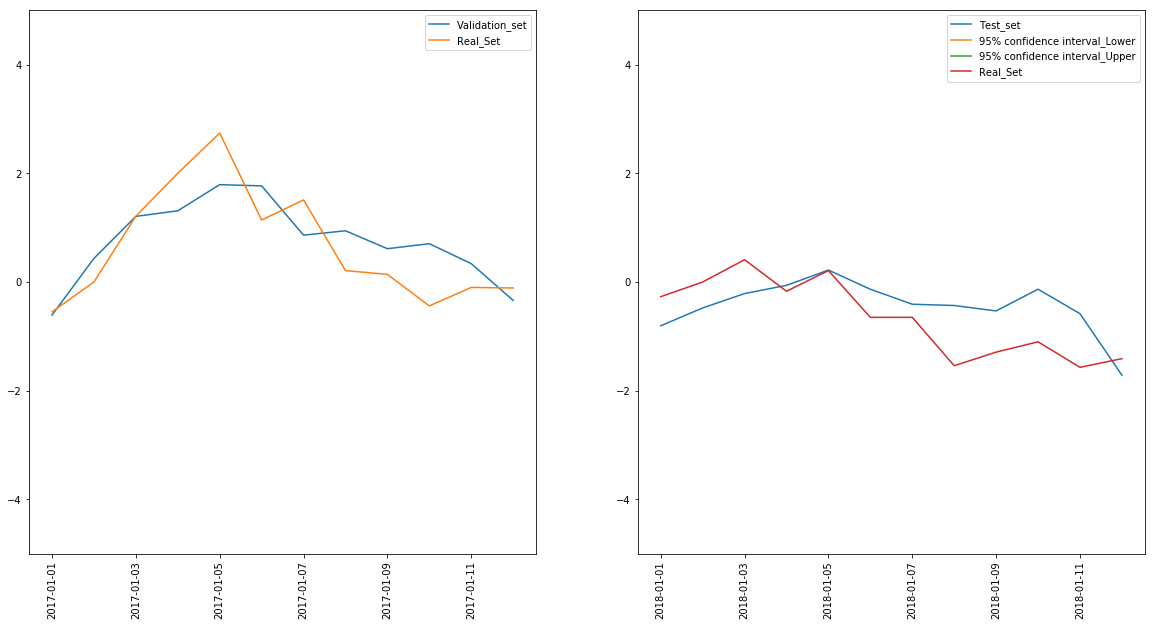

In [139]:
model = ARIMA(endog=endo_pc,exog=exo_pc, order=optimum_order)
model_fit = model.fit()
valid_pred_log=model_fit.forecast(exog=valid_multi_pc, steps=12)
test_pred_log=model_fit.forecast(exog=test_multi_pc, steps=12)
valid_pred=valid_pred_log[0]
test_pred=test_pred_log[0]

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

#plotting validation set 
plt.subplot(121) 
plt.plot(date_noindex.iloc[144:156,0],valid_pred,label='Validation_set')
plt.plot(date_noindex.iloc[144:156,0],date_noindex.iloc[144:156,3],label='Real_Set')
plt.xticks(rotation=90)
plt.legend()
plt.ylim(-5,5)
    
#plotting test set     
plt.subplot(122)    
plt.plot(date_noindex.iloc[156:168,0],test_pred,label='Test_set')
plt.plot(date_noindex.iloc[156:168,0],lower,label='95% confidence interval_Lower')
plt.plot(date_noindex.iloc[156:168,0],upper,label='95% confidence interval_Upper')
plt.plot(date_noindex.iloc[156:168,0],date_noindex.iloc[156:168,3],label='Real_Set')
plt.xticks(rotation=90)
plt.legend()
plt.ylim(-5,5)


## Visualising the final results


test accuracy on percentage change in 2018: 41.66666666666667


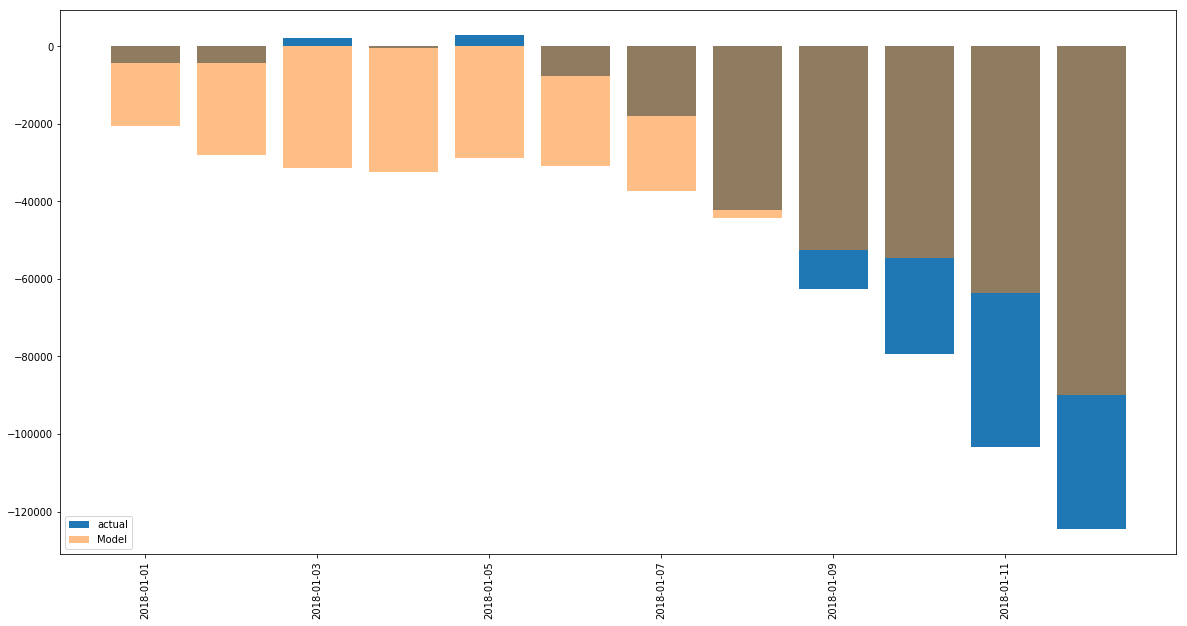

,0,2,3,inc/dec_pred,inc/dec_real,corr_pred,pred_hp,real_hp,HP_sav/app_model,HP_sav/app_actual
0,-0.805049,-0.27,2018-01-01,1,1,0,1.582833e+06,1.598971e+06,-20467.359041,-4328.910000
1,-0.477447,0.00,2018-01-02,1,1,0,1.575275e+06,1.598971e+06,-28024.538329,-4328.910000
2,-0.212588,0.41,2018-01-03,1,1,0,1.571927e+06,1.605527e+06,-31373.377621,2226.871469
3,-0.061627,-0.17,2018-01-04,1,0,1,1.570958e+06,1.602797e+06,-32342.112810,-502.524212
4,0.219414,0.21,2018-01-05,1,1,0,1.574405e+06,1.606163e+06,-28895.204368,2863.350487
5,-0.133367,-0.65,2018-01-06,0,0,1,1.572305e+06,1.595723e+06,-30994.933846,-7576.711292
6,-0.408949,-0.65,2018-01-07,0,0,1,1.565875e+06,1.585351e+06,-37424.859741,-17948.912668
7,-0.432457,-1.54,2018-01-08,0,0,1,1.559103e+06,1.560937e+06,-44196.589885,-42363.319413
8,-0.532400,-1.29,2018-01-09,0,1,0,1.550803e+06,1.540801e+06,-52497.250168,-62499.402593
9,-0.132241,-1.10,2018-01-10,1,1,0,1.548752e+06,1.523852e+06,-54548.046158,-79448.209164


In [140]:
date=date_noindex.loc[156:167,['Date']].reset_index(drop=True)
real=date_noindex.loc[156:167,['detached_PC']].reset_index()
pred_df=pd.DataFrame(test_pred)
results=pd.concat([pred_df,real,date],axis=1,join='outer',ignore_index=True)
res=results.drop(1,axis=1)
res['inc/dec_pred']=0
res['inc/dec_real']=0
res['corr_pred']=0
res['pred_hp']=1603300+(1603300*(-0.01276577))
res['real_hp']=1603300+(1603300*(-0.0027))


for i in range(0,12):
    if res.iloc[i,0]>res.iloc[i-1,0]:
        res.loc[i,['inc/dec_pred']]=1
    else:
        res.loc[i,['inc/dec_pred']]=0
        
for i in range(0,12):
    if res.iloc[i,1]>res.iloc[i-1,1]:
        res.loc[i,['inc/dec_real']]=1
    else:
        res.loc[i,['inc/dec_real']]=0
               
for i in range(0,12):
    if res.iloc[i,4]==res.iloc[i,5]:
        res.loc[i,['corr_pred']]=1
    else:
        res.loc[i,['corr_pred']]=0
per_change_acc=((res['corr_pred']==1).sum()/12)*100
print('test accuracy on percentage change in 2018:',per_change_acc)

for i in range (1,12):
    res.loc[i,['pred_hp']]=res.loc[i-1,['pred_hp']]+(res.loc[i-1,['pred_hp']]*(res.iloc[i,0]/100))
    res.loc[i,['real_hp']]=res.loc[i-1,['real_hp']]+(res.loc[i-1,['real_hp']]*(res.iloc[i,1]/100))

res['HP_sav/app_model']=res['pred_hp']-1603300
res['HP_sav/app_actual']=res['real_hp']-1603300

plt.bar(res.iloc[:,2],res['HP_sav/app_actual'],label='actual',alpha=1)
plt.bar(res.iloc[:,2],res['HP_sav/app_model'],label='Model',alpha=0.5)

plt.xticks(rotation='vertical')
plt.legend()
plt.show()

res

## arima with PC and log difference of exogeneous variables

### Splits

In [141]:
train_diff=ts_log_diff[0:143]
valid_diff=ts_log_diff[143:155]
test_diff=ts_log_diff[155:167]
endo_diff=ts.iloc[1:144,2]
exo_diff=train_diff[['Population Intrapolated',
        'Prime Rate', 'Unemployment', 'CPI',  
        'Per capita Income', 
        'cad to usd exchange rates','no of sales']]
valid_multi_diff=valid_diff[['Population Intrapolated',
        'Prime Rate', 'Unemployment', 'CPI',   
        'Per capita Income', 
        'cad to usd exchange rates','no of sales']]
test_multi_diff=test_diff[['Population Intrapolated',
        'Prime Rate', 'Unemployment', 'CPI',   
        'Per capita Income', 
        'cad to usd exchange rates','no of sales']]
valid_true_pc=ts.iloc[144:156,2]
pred_true_pc=ts.iloc[156:168,2]


## Looping to find out best p,d and q values

In [142]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))
error=[]
order=[]
for para in pdq:
    try:
        model = ARIMA(endog=endo_diff,exog=exo_diff, order=para)
        model_fit = model.fit()
        valid_pred_log=model_fit.forecast(exog=valid_multi_diff, steps=12)
        valid_pred=valid_pred_log[0]
        mse=mean_squared_error(valid_true_pc,valid_pred)
        error.append(mse)
        order.append(para)
        print(para)
        print(mse)
        print(valid_pred)
    except:
        continue
#Getting optimum p,q and d values
optimum_error_pos= error.index(min(error))
optimum_order=order[optimum_error_pos]
print(optimum_error_pos)
print(optimum_order)
print(min(error))

(0, 0, 0)
1.159779297095118
[1.09831858 1.56552327 1.32272499 0.7874446  1.27427548 1.04453972
 1.61947526 1.61410687 1.48260711 0.47199538 0.58858735 0.02073959]
(0, 0, 1)
0.8259828016451487
[-0.27365995  1.16806213  1.1778185   0.96762733  1.14416111  0.98893591
  0.94231995  1.22389341  1.08060492  0.76496847  0.75194458  0.53959442]
(0, 0, 2)
0.8192283052640047
[-0.44924083  0.72324313  1.05054411  0.92913477  0.99779219  0.94955922
  1.02976783  1.12259638  1.18474296  0.74968023  0.81369281  0.69539173]
(0, 0, 3)
0.7965640795769225
[-0.8350412   0.38721373  0.84741845  0.92959415  1.03263826  0.93602421
  0.93662781  1.18229245  1.1371748   0.76922201  0.78918861  0.64651942]
(0, 0, 4)
0.9212078736765137
[-1.15500968 -0.50314048  0.37040428  0.76326404  1.01555522  0.86118647
  0.80268736  1.11348454  1.05046803  0.81663475  0.8109647   0.66130329]
(0, 0, 5)
1.0977126881662225
[-1.11781214e+00 -4.84689039e-01 -5.73140467e-04  3.83903197e-01
  8.59431986e-01  8.51441046e-01  7.911

(4, 1, 1)
0.8772264757698728
[-1.31288822 -0.40331908  0.46232459  0.94562429  1.39677032  1.55655441
  1.22467346  1.3259533   1.16485031  1.10907125  0.86819156  0.53764574]
(4, 2, 0)
53.908277499679635
[ -2.30107513  -2.81943558  -3.37770314  -3.92548328  -4.49903434
  -5.18115571  -6.17967429  -7.20986013  -8.26990851  -9.26619412
 -10.28645542 -11.10032739]
(4, 2, 3)
24.436183749054795
[-1.58130242 -1.8730111  -2.3171892  -2.59006301 -3.27283969 -3.51846854
 -4.05430848 -4.61770255 -5.0923002  -5.86418361 -6.42507761 -6.90879081]
(4, 2, 4)
11.02276293853579
[-0.96569519 -0.81554539 -0.89893999 -1.10634572 -1.65019971 -1.83543341
 -2.35629649 -2.76618012 -3.24951735 -3.94118306 -4.42976302 -4.89657647]
(4, 2, 5)
23.80022659245334
[-1.56136868 -2.12181706 -2.27486792 -2.72690172 -2.94619702 -3.71830031
 -3.9811457  -4.51862053 -4.94501394 -5.79174981 -6.39820337 -6.66556484]
(5, 0, 0)
1.2328878867892752
[-1.17575312 -0.46771972  0.21070639  0.61714679  1.13863073  1.26507961
  1.346

## Fitting the model with best parameters and plotting the validation and test sets

Populating the interactive namespace from numpy and matplotlib


(-5, 5)

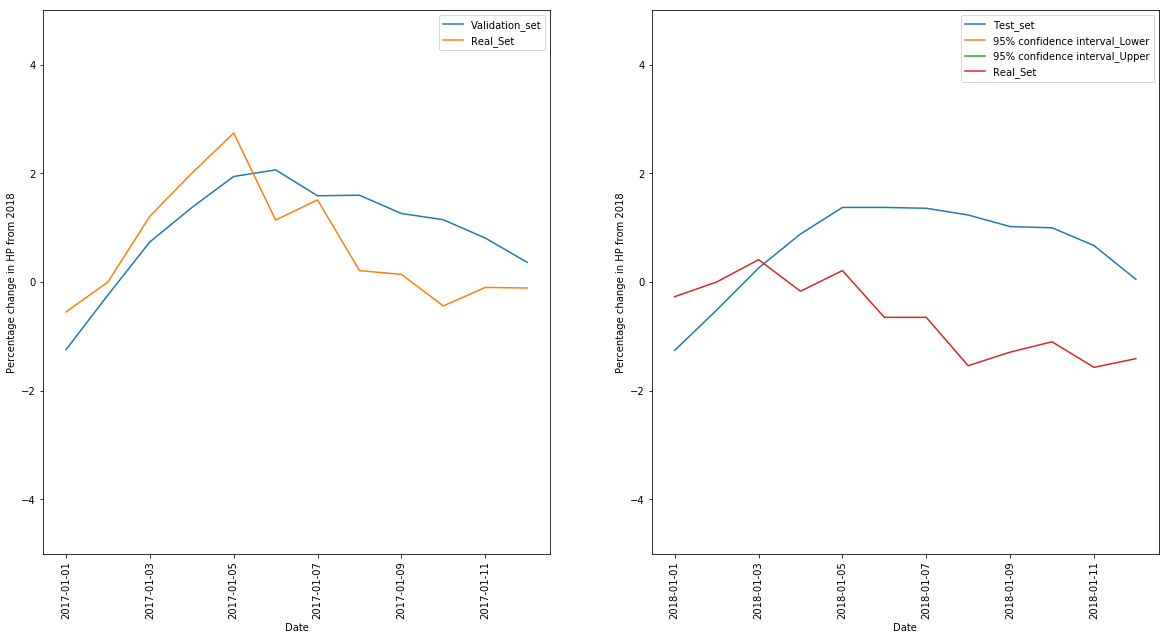

In [143]:
model = ARIMA(endog=endo_diff,exog=exo_diff, order=optimum_order)
model_fit = model.fit()
valid_pred_log=model_fit.forecast(exog=valid_multi_diff, steps=12)
test_pred_log=model_fit.forecast(exog=test_multi_diff, steps=12)
valid_pred=valid_pred_log[0]
test_pred=test_pred_log[0]

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

#plotting validation set 
plt.subplot(121) 
plt.plot(date_noindex.iloc[144:156,0],valid_pred,label='Validation_set')
plt.plot(date_noindex.iloc[144:156,0],date_noindex.iloc[144:156,3],label='Real_Set')
plt.xlabel('Date')
plt.ylabel('Percentage change in HP from 2018')
plt.xticks(rotation=90)
plt.legend()
plt.ylim(-5,5)
    
#plotting test set     
plt.subplot(122)    
plt.plot(date_noindex.iloc[156:168,0],test_pred,label='Test_set')
plt.plot(date_noindex.iloc[156:168,0],lower,label='95% confidence interval_Lower')
plt.plot(date_noindex.iloc[156:168,0],upper,label='95% confidence interval_Upper')
plt.plot(date_noindex.iloc[156:168,0],date_noindex.iloc[156:168,3],label='Real_Set')
plt.xlabel('Date')
plt.ylabel('Percentage change in HP from 2018')
plt.xticks(rotation=90)
plt.legend()
plt.ylim(-5,5)


## Visualising the final results


test accuracy on percentage change in 2018: 41.66666666666667


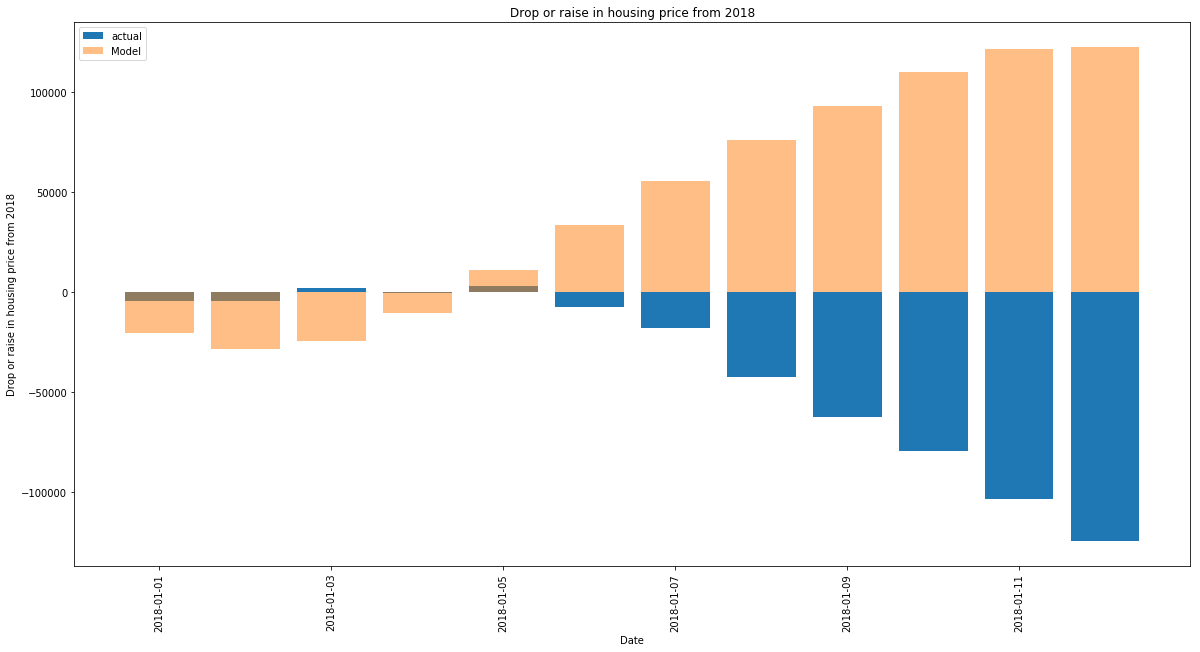

In [144]:
date=date_noindex.loc[156:167,['Date']].reset_index(drop=True)
real=date_noindex.loc[156:167,['detached_PC']].reset_index()
pred_df=pd.DataFrame(test_pred)
results=pd.concat([pred_df,real,date],axis=1,join='outer',ignore_index=True)
res=results.drop(1,axis=1)
res['inc/dec_pred']=0
res['inc/dec_real']=0
res['corr_pred']=0
res['pred_hp']=1603300+(1603300*(-0.01276577))
res['real_hp']=1603300+(1603300*(-0.0027))


for i in range(0,12):
    if res.iloc[i,0]>res.iloc[i-1,0]:
        res.loc[i,['inc/dec_pred']]=1
    else:
        res.loc[i,['inc/dec_pred']]=0
        
for i in range(0,12):
    if res.iloc[i,1]>res.iloc[i-1,1]:
        res.loc[i,['inc/dec_real']]=1
    else:
        res.loc[i,['inc/dec_real']]=0
               
for i in range(0,12):
    if res.iloc[i,4]==res.iloc[i,5]:
        res.loc[i,['corr_pred']]=1
    else:
        res.loc[i,['corr_pred']]=0
per_change_acc=((res['corr_pred']==1).sum()/12)*100
print('test accuracy on percentage change in 2018:',per_change_acc)

for i in range (1,12):
    res.loc[i,['pred_hp']]=res.loc[i-1,['pred_hp']]+(res.loc[i-1,['pred_hp']]*(res.iloc[i,0]/100))
    res.loc[i,['real_hp']]=res.loc[i-1,['real_hp']]+(res.loc[i-1,['real_hp']]*(res.iloc[i,1]/100))

res['HP_sav/app_model']=res['pred_hp']-1603300
res['HP_sav/app_actual']=res['real_hp']-1603300

plt.bar(res.iloc[:,2],res['HP_sav/app_actual'],label='actual',alpha=1)
plt.bar(res.iloc[:,2],res['HP_sav/app_model'],label='Model',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Drop or raise in housing price from 2018')
plt.title('Drop or raise in housing price from 2018')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

